In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_harm = 7
div_ratio = 48000/440

In [3]:
div_ratio

109.0909090909091

In [4]:
ddelay = np.ceil(div_ratio + 0.5*(n_harm-1)) + np.arange(-n_harm, 1)

In [5]:
ddelay

array([106., 107., 108., 109., 110., 111., 112., 113.])

In [6]:
phase_delay = -2*np.pi*ddelay[None, :]/div_ratio*np.arange(1, n_harm+1)[:, None]

In [7]:
lhs = np.concatenate((np.cos(phase_delay[0:1]), np.sin(phase_delay)))

In [8]:
lhs

array([[ 0.98419561,  0.99275734,  0.99802673,  0.99998629,  0.99862953,
         0.99396096,  0.98599604,  0.97476119],
       [ 0.17708474,  0.12013684,  0.06279052,  0.00523596, -0.05233596,
        -0.10973431, -0.16676875, -0.22325012],
       [ 0.34857205,  0.23853346,  0.12533323,  0.01047178, -0.10452846,
        -0.21814324, -0.32886665, -0.4352311 ],
       [ 0.50904142,  0.35347484,  0.18738131,  0.01570732, -0.15643447,
        -0.32391742, -0.48175367, -0.62524266],
       [ 0.6534206 ,  0.46329604,  0.24868989,  0.02094242, -0.20791169,
        -0.42577929, -0.62114778, -0.78369346],
       [ 0.77714596,  0.56640624,  0.30901699,  0.02617695, -0.25881905,
        -0.52249856, -0.74314483, -0.90258528],
       [ 0.87630668,  0.66131187,  0.36812455,  0.03141076, -0.30901699,
        -0.61290705, -0.84432793, -0.97591676],
       [ 0.94776841,  0.74663818,  0.42577929,  0.03664371, -0.35836795,
        -0.6959128 , -0.92186315, -0.99998629]])

In [9]:
rhs = np.concatenate((np.ones(1), np.zeros(n_harm)))

In [10]:
rhs

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
coeffs = np.linalg.solve(lhs, rhs)

In [12]:
coeffs

array([-2.40953762e-02, -2.00856860e-01,  1.23217703e-01,  1.04888772e+00,
        3.16365288e-01, -2.23622856e-01, -4.27090578e-02, -2.86825361e-04])

In [13]:
f_norm_test = np.arange(0, 0.5, 0.001)

In [14]:
transf = (np.exp(-2j*np.pi*ddelay[None, :]*f_norm_test[:, None])*coeffs[None, :]).sum(axis=1)

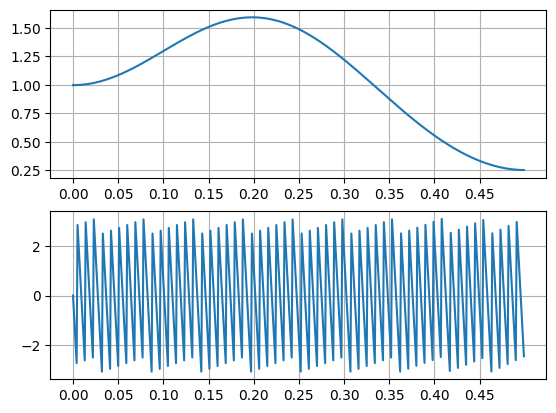

In [15]:
fig, ax = plt.subplots(2)
ax[0].plot(f_norm_test, np.abs(transf))
ax[1].plot(f_norm_test, np.angle(transf))
ax[0].set_xticks(f_norm_test[0::50])
ax[0].grid()
ax[1].set_xticks(f_norm_test[0::50])
ax[1].grid()

In [16]:
f_norm_test = np.arange(1, 20)/div_ratio

In [17]:
transf = (np.exp(-2j*np.pi*ddelay[None, :]*f_norm_test[:, None])*coeffs[None, :]).sum(axis=1)

In [18]:
np.angle(transf)

array([ 2.15105711e-16,  3.98772619e-16, -1.04311964e-15,  7.30251193e-16,
       -2.59099011e-17, -1.75062487e-15, -1.02564490e-15,  2.09411510e-13,
        2.83391255e-12,  1.93677313e-11,  9.32068505e-11,  3.57972509e-10,
        1.16995166e-09,  3.38163536e-09,  8.86815442e-09,  2.14843567e-08,
        4.87282645e-08,  1.04527018e-07,  2.13763239e-07])

In [19]:
np.abs(transf)

array([1.        , 1.00923641, 1.02441716, 1.04522709, 1.07123433,
       1.10189941, 1.13658653, 1.17457685, 1.21508336, 1.25726706,
       1.30025404, 1.34315304, 1.38507316, 1.42514126, 1.46251868,
       1.49641689, 1.52611186, 1.55095667, 1.57039233])